In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='whitegrid')

In [41]:
votes_df = pd.read_csv("./data/votes_dataset_clean.csv")
votes_df.head()

,Year,(semi-) final,Jury or Televoting,From country,To country,Points
0,1975,f,J,Belgium,Belgium,0
1,1975,f,J,Belgium,Finland,0
2,1975,f,J,Belgium,France,2
3,1975,f,J,Belgium,Germany,0
4,1975,f,J,Belgium,Ireland,12


Parameters for selecting data to plot (can be modified):

In [42]:
year_range = (1975, 2016)
finals_only = True

In [43]:
votes_df = votes_df[(votes_df['Year'] >= year_range[0]) & (votes_df['Year'] <= year_range[1])]
if finals_only:
    votes_df = votes_df[votes_df['(semi-) final'] == 'f']
    
countries_to_exclude = set(['Bosnia', 'Serbia & Montenegro', 'Yugoslavia', 'Australia'])
country_filter = [(votes_df['From country'][i] not in countries_to_exclude) and
                  (votes_df['To country'][i] not in countries_to_exclude)
                  for i in votes_df.index]
votes_df = votes_df[country_filter]

# Filter out televoting for consistency (only in 2016)
votes_df = votes_df[votes_df['Jury or Televoting'] == 'J']

In [44]:
# Number of participating countries each year
data = votes_df[['From country', 'Year']].drop_duplicates().groupby('Year').count()

In [45]:
avg_from_all_by_country_year = votes_df.groupby(['To country', 'Year']).mean().reset_index()
avg_from_all_by_country_year.head()

,To country,Year,Points
0,Albania,2004,2.800000
1,Albania,2005,1.184211
2,Albania,2008,1.279070
3,Albania,2009,1.142857
4,Albania,2010,1.589744


## 1. Points given from one country to another across different years

In [46]:
from_country = 'Ukraine'
to_country = 'Russia'

data = votes_df[(votes_df['From country'] == from_country) 
                & (votes_df['To country'] == to_country) ]
data.head()


,Year,(semi-) final,Jury or Televoting,From country,To country,Points
13693,2003,f,J,Ukraine,Russia,12
14559,2004,f,J,Ukraine,Russia,10
16287,2005,f,J,Ukraine,Russia,4
18175,2006,f,J,Ukraine,Russia,12
20056,2007,f,J,Ukraine,Russia,10


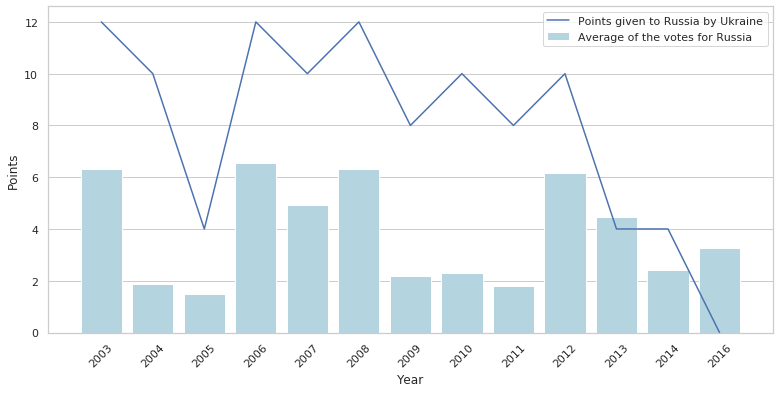

In [47]:
overall_data = avg_from_all_by_country_year[avg_from_all_by_country_year['To country'] == to_country]
year_filter = [y in set(data['Year'].values) for y in overall_data['Year']]
overall_data = overall_data[year_filter]

relevant_year_range = (min(data['Year'].values), max(data['Year'].values))

fig, ax = plt.subplots()

sns.barplot(x="Year", y="Points", ax=ax, data=overall_data, 
            color='lightblue', label='Average of the votes for {}'.format(to_country))
sns.lineplot(x=[i for i in range(len(data))], y=data["Points"], ax=ax,
             label='Points given to {} by {}'.format(to_country, from_country))

plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
ax.legend()

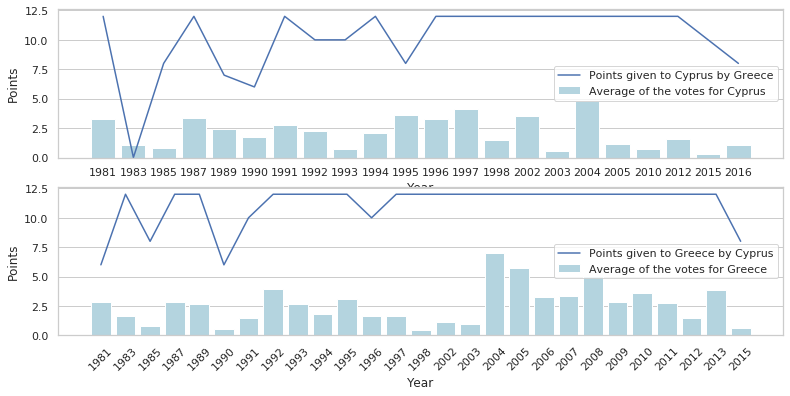

In [48]:
# Two plots, for both directions:

from_country = 'Greece'
to_country = 'Cyprus'

data = votes_df[(votes_df['From country'] == from_country) 
                & (votes_df['To country'] == to_country) ]

overall_data = avg_from_all_by_country_year[avg_from_all_by_country_year['To country'] == to_country]
year_filter = [y in set(data['Year'].values) for y in overall_data['Year']]
overall_data = overall_data[year_filter]


fig, axes = plt.subplots(2, 1)
ax1 = axes[0]
ax2 = axes[1]

sns.barplot(x="Year", y="Points", ax=ax1, data=overall_data, 
            color='lightblue', label='Average of the votes for {}'.format(to_country))
sns.lineplot(x=[i for i in range(len(data))], y=data["Points"], ax=ax1,
             label='Points given to {} by {}'.format(to_country, from_country))

# + the other way around
data = votes_df[(votes_df['From country'] == to_country) 
                & (votes_df['To country'] == from_country) ]

overall_data = avg_from_all_by_country_year[avg_from_all_by_country_year['To country'] == from_country]
year_filter = [y in set(data['Year'].values) for y in overall_data['Year']]
overall_data = overall_data[year_filter]

sns.barplot(x="Year", y="Points", ax=ax2, data=overall_data, 
            color='lightblue', label='Average of the votes for {}'.format(from_country))
sns.lineplot(x=[i for i in range(len(data))], y=data["Points"], ax=ax2,
             label='Points given to {} by {}'.format(from_country, to_country))

plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
ax1.legend()
ax2.legend()


## 2. Average votes for other countries from a specified country

In [49]:
from_country = 'France'

data = votes_df[votes_df['From country'] == from_country][['Year', 'To country', 'Points']]\
    .sort_values('To country')  # alphabetical order
relevant_year_range = (min(data['Year'].values), max(data['Year'].values))
data.head()

,Year,To country,Points
15695,2005,Albania,1
25309,2010,Albania,0
28852,2012,Albania,0
21639,2008,Albania,0
14015,2004,Albania,1


Text(0.5, 1.0, 'Average points given to other countries by France during 1975-2016')

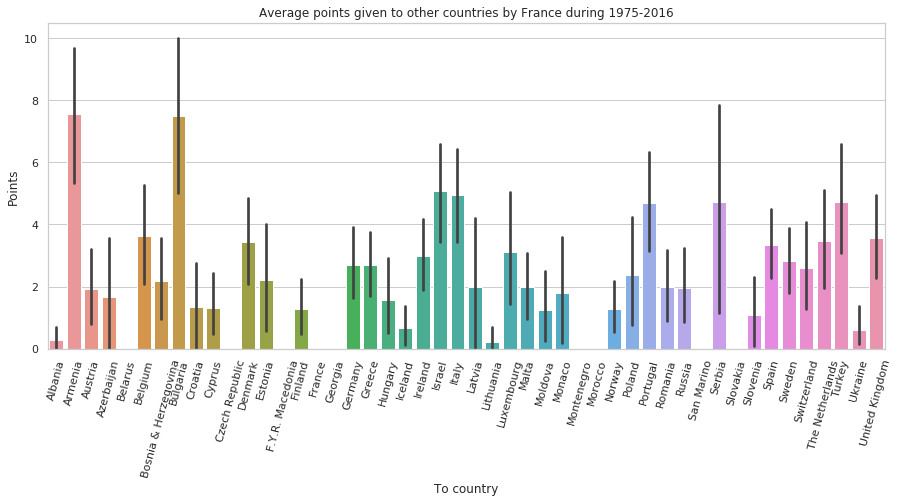

In [50]:
plt.gcf().set_size_inches(15, 6)
plt.xticks(rotation=75)
ax = sns.barplot(x="To country", y="Points", data=data)
ax.set_title('Average points given to other countries by {} during {}-{}'.format(from_country, 
                                                                                 relevant_year_range[0],
                                                                                 relevant_year_range[1]))

## 3. Same, but to_country

Text(0.5, 1.0, 'Average points given by other countries to Sweden during 1975-2016')

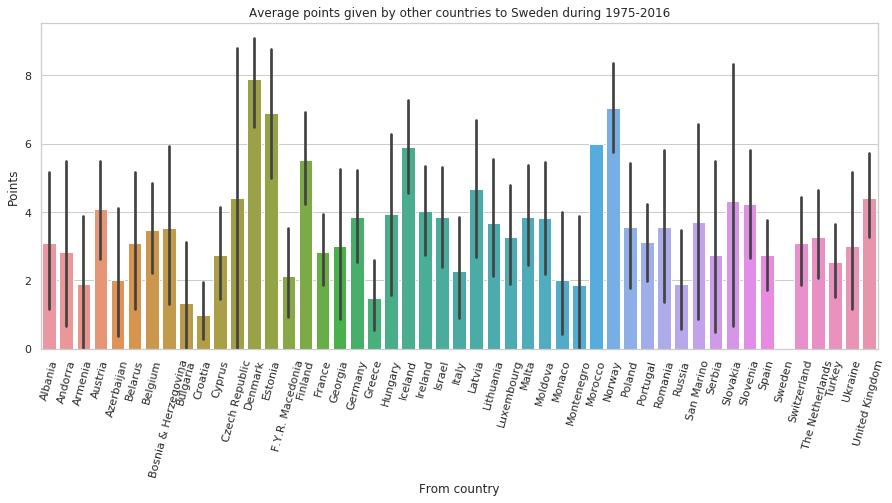

In [51]:
to_country = 'Sweden'

data = votes_df[votes_df['To country'] == to_country][['Year', 'From country', 'Points']]\
    .sort_values('From country')  # alphabetical order
relevant_year_range = (min(data['Year'].values), max(data['Year'].values))

plt.gcf().set_size_inches(15, 6)
plt.xticks(rotation=75)
ax = sns.barplot(x="From country", y="Points", data=data)

ax.set_title('Average points given by other countries to {} during {}-{}'.format(to_country, 
                                                                                 relevant_year_range[0],
                                                                                 relevant_year_range[1]))

## 4. Cluster map

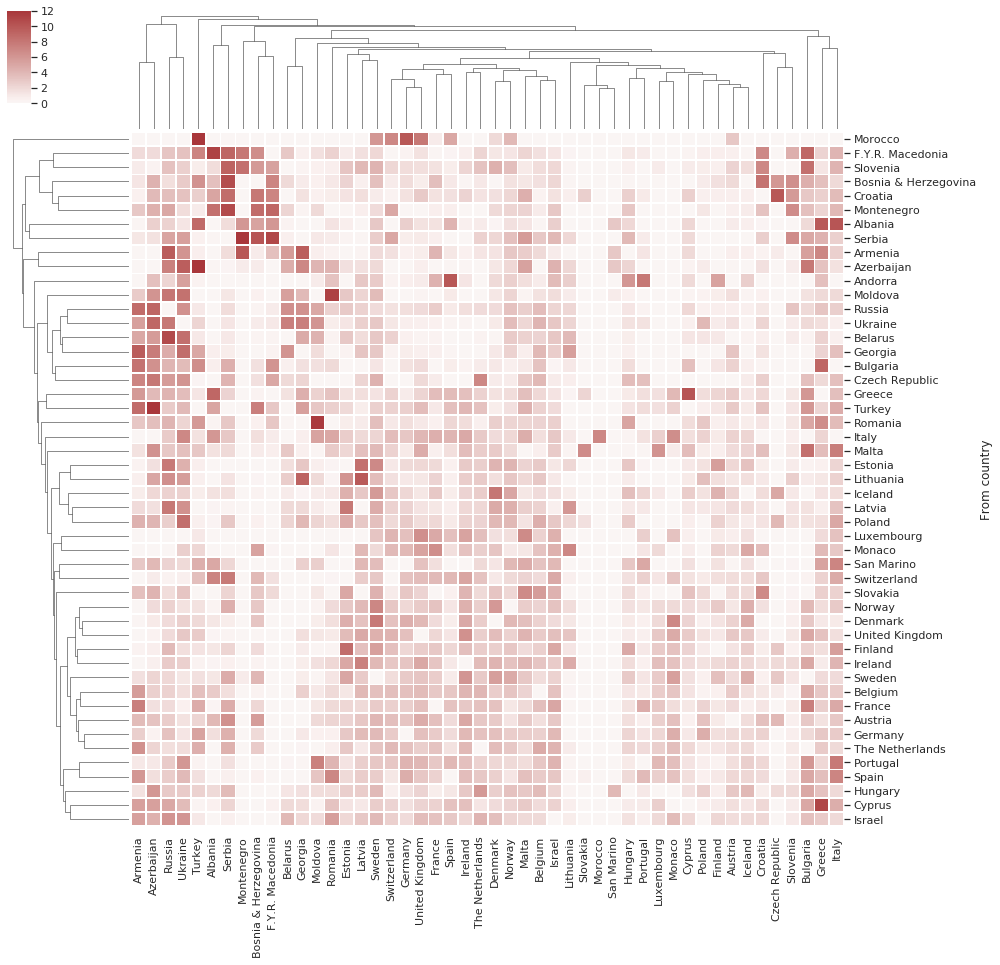

In [52]:
avg_votes_by_countries_pairs = votes_df\
                                [['From country', 'To country', 'Points']]\
                                .groupby(['From country', 'To country']).mean().unstack('To country')
# Reset multiple column levels
avg_votes_by_countries_pairs.columns = [country for _, country in avg_votes_by_countries_pairs.columns]

# Note: note entirely accurate because of years when some countries have not particpated
avg_votes_by_countries_pairs = avg_votes_by_countries_pairs.fillna(value=0)


# Draw the full plot
sns.clustermap(avg_votes_by_countries_pairs, center=0, cmap="vlag",
               # row_cluster=False, col_cluster=False,
               linewidths=.75, figsize=(15, 15))